<a href="https://colab.research.google.com/github/seonghwan2079/network/blob/main/41915025_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#한글깨짐 해결법 이거먼저해함

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager .FontProperties(fname=font_path).get_name()
rc('font' ,family=font)

In [6]:
import requests
import xml.etree.ElementTree as ET

def search_testing_centers_by_region(region, date):
    url = 'http://apis.data.go.kr/1352000/ODMS_COVID_04/callCovid04Api'
    params = {
        'serviceKey': 'mCQAQutHDT4i6gII5pwL+bpJ7hLDJxArS62exBNOgxlYfO7BcNyptPw/FcMFZ+YrOmVvtQ/xkt40aPwmaHtvFw==',
        'pageNo': '1',
        'numOfRows': '500',
        'apiType': 'xml',
        'std_day': date,
       
    }

    res = requests.get(url, params=params)
    return res.content


def extract_data_by_location(xml_content, location):
    root = ET.fromstring(xml_content)
    items = root.findall('.//item')

    for item in items:
        if item.find('gubun').text == location:
            return item

    return None


def translate_text(text):
    translation_dict = {
        'deathCnt': '사망자 수',
        'defCnt': '확진자 수',
        'gubun': '지역',
        'gubunCn': '지역(중문)',
        'gubunEn': '지역(영문)',
        'incDec': '전일대비 증감 수',
        'isolClearCnt': '격리해제 수',
        'isolIngCnt': '격리 중인 환자 수',
        'localOccCnt': '지역발생 수',
        'overFlowCnt': '해외유입 수',
        'qurRate': '10만명당 발생률',
        'stdDay': '기준일'
    }
    
    return translation_dict.get(text, text)


# 사용자로부터 지역과 날짜 입력 받기
location = input("조회할 지역을 입력하세요: ")
date = input("조회할 날짜를 입력하세요 (YYYY-MM-DD 형식): ")

# 입력한 지역명과 날짜로 데이터 조회
all_centers_xml = search_testing_centers_by_region('전국', date)
location_data = extract_data_by_location(all_centers_xml, location)

if location_data:
    print(f"{location}의 {date} 데이터:")
    for child in location_data:
        translated_tag = translate_text(child.tag)
        print(f"{translated_tag}: {child.text}")
else:
    print(f"{location}의 {date} 데이터를 찾을 수 없습니다.")

조회할 지역을 입력하세요: 인천
조회할 날짜를 입력하세요 (YYYY-MM-DD 형식): 2022-06-01
인천의 2022-06-01 데이터:
사망자 수: 1392
확진자 수: 1072644
지역: 인천
지역(중문): 仁川
지역(영문): Incheon
전일대비 증감 수: 537
격리해제 수: 0
격리 중인 환자 수: 0
지역발생 수: 520
해외유입 수: 17
10만명당 발생률: 36381
기준일: 2022-06-01


조회할 지역을 입력하세요: 인천
조회할 날짜를 입력하세요 (YYYY-MM-DD 형식): 2022-06-01
인천의 2022-06-01 데이터:
사망자 수: 1392
확진자 수: 1072644
전일대비 증감 수: 537
격리해제 수: 0
격리 중인 환자 수: 0
지역발생 수: 520
해외유입 수: 17
10만명당 발생률: 36381


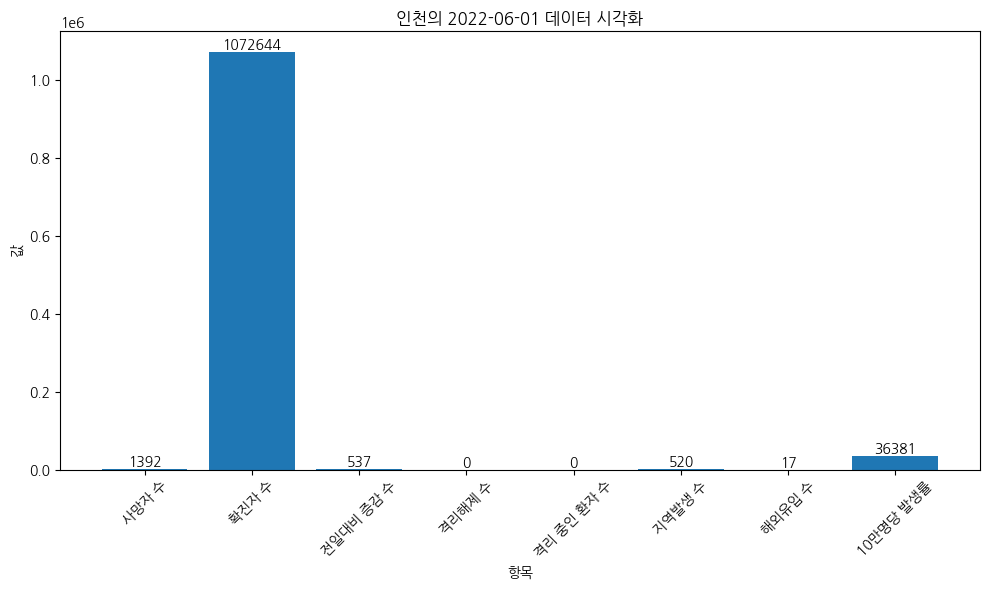

In [7]:
import matplotlib.pyplot as plt


def plot_data(location, date, data):
    categories = []
    values = []

    for child in data:
        translated_tag = translate_text(child.tag)
        
        # 지역, 지역(중문), 지역(영문), 기준일을 제외하고 데이터 추가
        if translated_tag not in ['지역', '지역(중문)', '지역(영문)', '기준일']:
            categories.append(translated_tag)

            # 값이 숫자로 변환 가능한지 확인
            if child.text.isdigit():
                values.append(int(child.text))
            else:
                values.append(0)  # 숫자로 변환할 수 없는 경우 0으로 처리

    plt.figure(figsize=(10, 6))  # 그래프의 크기 조정 (가로 10, 세로 6)
    bars = plt.bar(categories, values)
    plt.xlabel('항목')
    plt.ylabel('값')
    plt.title(f"{location}의 {date} 데이터 시각화")
    plt.xticks(rotation=45)  # x축 레이블 회전

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    plt.tight_layout()  # 그래프 요소들이 잘리지 않도록 조정
    plt.show()

# 사용자로부터 지역과 날짜 입력 받기
location = input("조회할 지역을 입력하세요: ")
date = input("조회할 날짜를 입력하세요 (YYYY-MM-DD 형식): ")

# 입력한 지역명과 날짜로 데이터 조회
all_centers_xml = search_testing_centers_by_region('전국', date)
location_data = extract_data_by_location(all_centers_xml, location)

if location_data:
    print(f"{location}의 {date} 데이터:")
    for child in location_data:
        translated_tag = translate_text(child.tag)
        
        # 지역, 지역(중문), 지역(영문), 기준일을 제외하고 출력
        if translated_tag not in ['지역', '지역(중문)', '지역(영문)', '기준일']:
            print(f"{translated_tag}: {child.text}")

    # 데이터 시각화
    plot_data(location, date, location_data)
else:
    print(f"{location}의 {date} 데이터를 찾을 수 없습니다.")


In [ ]:
import folium
import pandas as pd
from google.colab import drive

# 구글 드라이브 마운트
drive.mount('/content/drive')
# 구글 드라이브에서 엑셀 파일 읽기
file_path = '/content/drive/MyDrive/선별진료소 위도,경도.xlsx'
raw = pd.read_excel(file_path)

# 마커 클러스터링, 미니맵 사용을 위해 라이브러리 추가
from folium.plugins import MarkerCluster
from folium.plugins import MiniMap

# 지도 생성하기
seoul_station = [37.5536067,126.9674308]  
m = folium.Map(location=seoul_station,
               zoom_start=12)

# 마커 클러스터 추가하기
marker_cluster = MarkerCluster().add_to(m)  

# 미니맵 추가하기
minimap = MiniMap() 
minimap.add_to(m)

# 위치 하나씩 추가하기
for i in raw.index:
    name = raw.loc[i, 'place_name']
    long = raw.loc[i, 'x']  # 경도
    lat = raw.loc[i, 'y']   # 위도
    folium.Marker([lat, long],tooltip= name).add_to(marker_cluster)


# 지도 저장하기
m.save('41915025.html')
m

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
